<a href="https://colab.research.google.com/github/Kallukalluzzz/Mini-Project/blob/main/LSTM_AUTOENCODER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from pandas_profiling import ProfileReport

In [3]:
data=pd.read_csv("/DGA dataset_new.csv")

In [4]:
data

,NM,H2,CH4,C2H6,C2H4,C2H2,Type
0,1,3930.0,2397.0,157.0,0.0,0.0,Partial discharge
1,2,37800.0,1740.0,249.0,8.0,8.0,Partial discharge
2,3,92600.0,10200.0,0.0,0.0,0.0,Partial discharge
3,4,8266.0,1061.0,22.0,0.0,0.0,Partial discharge
4,5,9340.0,995.0,60.0,6.0,7.0,Partial discharge
...,...,...,...,...,...,...,...
266,267,2443.0,3422.0,7852.0,3000.0,6394.0,No fault
267,268,4395.0,5201.0,6933.0,6788.0,2121.0,No fault
268,269,7613.0,1120.0,3363.0,4751.0,3393.0,No fault
269,270,2366.0,1031.0,5909.0,108.0,7025.0,No fault


In [5]:
X=data.drop(['Type'],axis=1)
Y=data['Type']

In [6]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.5)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain))
Xtrain.sample(frac=1)

Xtest = pd.DataFrame(scaler.transform(Xtest))

In [13]:
Xtrain

array([[[7.24528302e-01, 2.64549536e-03, 8.89766792e-03]],

       [[3.19265047e-03, 3.35897784e-03, 8.91298696e-06]],

       [[1.05660377e-01, 1.10228973e-05, 2.22441698e-06]],

       [[4.94984569e-06, 1.50723364e-05, 7.72458870e-05]],

       [[7.16981132e-01, 3.99580028e-03, 2.09095196e-03]],

       [[5.22208720e-04, 6.93327477e-04, 9.06153675e-05]],

       [[1.66037736e-01, 8.51518817e-03, 1.11665732e-02]],

       [[7.99400079e-04, 8.18212550e-03, 3.77316448e-03]],

       [[7.88679245e-01, 2.65073123e-02, 1.73504524e-03]],

       [[5.44483026e-04, 1.93787183e-05, 5.64489174e-05]],

       [[7.92452830e-01, 2.67112359e-02, 1.56154072e-03]],

       [[4.90034723e-04, 2.15319092e-05, 5.64489174e-05]],

       [[4.15094340e-01, 2.40216490e-04, 3.83934371e-05]],

       [[9.75119601e-06, 2.77115672e-05, 4.87391837e-05]],

       [[6.41509434e-02, 5.78702109e-04, 4.89371736e-05]],

       [[1.48495371e-05, 1.29191455e-05, 1.03984848e-05]],

       [[3.69811321e-01, 1.50297205e-04,

In [12]:
Xtrain = Xtrain.values.reshape(-1, 1, 3)

Xtest  = Xtest.values.reshape(-1, 1, 3)

In [14]:
Xtrain

array([[[7.24528302e-01, 2.64549536e-03, 8.89766792e-03]],

       [[3.19265047e-03, 3.35897784e-03, 8.91298696e-06]],

       [[1.05660377e-01, 1.10228973e-05, 2.22441698e-06]],

       [[4.94984569e-06, 1.50723364e-05, 7.72458870e-05]],

       [[7.16981132e-01, 3.99580028e-03, 2.09095196e-03]],

       [[5.22208720e-04, 6.93327477e-04, 9.06153675e-05]],

       [[1.66037736e-01, 8.51518817e-03, 1.11665732e-02]],

       [[7.99400079e-04, 8.18212550e-03, 3.77316448e-03]],

       [[7.88679245e-01, 2.65073123e-02, 1.73504524e-03]],

       [[5.44483026e-04, 1.93787183e-05, 5.64489174e-05]],

       [[7.92452830e-01, 2.67112359e-02, 1.56154072e-03]],

       [[4.90034723e-04, 2.15319092e-05, 5.64489174e-05]],

       [[4.15094340e-01, 2.40216490e-04, 3.83934371e-05]],

       [[9.75119601e-06, 2.77115672e-05, 4.87391837e-05]],

       [[6.41509434e-02, 5.78702109e-04, 4.89371736e-05]],

       [[1.48495371e-05, 1.29191455e-05, 1.03984848e-05]],

       [[3.69811321e-01, 1.50297205e-04,

In [15]:
from keras.layers import Input, Dropout, Dense, LSTM, RepeatVector, TimeDistributed
from keras.models import Model, Sequential, load_model
from keras import regularizers

In [19]:
# Input layer:
model=Sequential([
    LSTM(32, activation='relu', input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    Dropout(0.2),
    RepeatVector(Xtrain.shape[1]),
    LSTM(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    TimeDistributed(Dense(Xtrain.shape[2]))
])

model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 32)                4608      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 repeat_vector_1 (RepeatVect  (None, 1, 32)            0         
 or)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout_4 (Dropout)         (None, 1, 32)             0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 3)             99        
 ibuted)                                                

In [20]:
# Train model for 100 epochs, batch size of 1000: 
NUM_EPOCHS=100
BATCH_SIZE=1000

history=model.fit(Xtrain,Xtrain, 
                  batch_size=BATCH_SIZE, 
                  epochs=NUM_EPOCHS,
                  validation_split=0.1,
                  shuffle=True)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.0634 - accuracy: 0.4897 - val_loss: 0.1032 - val_accuracy: 0.4815
Epoch 2/100
1/1 [==============================] - 0s 44ms/step - loss: 0.0630 - accuracy: 0.4321 - val_loss: 0.1027 - val_accuracy: 0.6296
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.0627 - accuracy: 0.4362 - val_loss: 0.1022 - val_accuracy: 0.5926
Epoch 4/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0624 - accuracy: 0.4733 - val_loss: 0.1017 - val_accuracy: 0.5926
Epoch 5/100
1/1 [==============================] - 0s 43ms/step - loss: 0.0621 - accuracy: 0.4650 - val_loss: 0.1013 - val_accuracy: 0.5926
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0617 - accuracy: 0.4815 - val_loss: 0.1008 - val_accuracy: 0.5926
Epoch 7/100
1/1 [==============================] - 0s 45ms/step - loss: 0.0613 - accuracy: 0.5021 - val_loss: 0.1003 - val_accuracy: 0.5926
Epoch 8/100
1/1 [=====

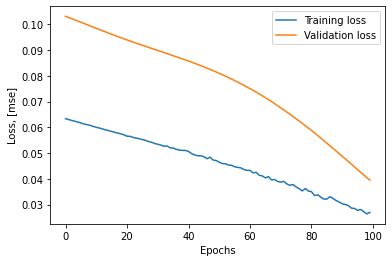

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Loss, [mse]')
plt.show()